This note book is an experiment to see how CBM-CFS3 handles partial disturbance (ie. non-biomass clearing) and stand replacing disturbance for historical and last pass disturbances.

In [1]:
import sys, os, json, subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import cbm3_python_helper
cbm3_python_helper.load_cbm3_python()
import cbm3_python.simulation.projectsimulator
from cbm3_python.cbm3data import cbm3_results
from cbm3_python.cbm3data import sit_helper
standard_import_tool_plugin_path=sit_helper.load_standard_import_tool_plugin()

In [3]:
project_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3\Projects\makelist_partial_disturbance\makelist_partial_disturbance.mdb"
results_db_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3\Projects\makelist_partial_disturbance\makelist_partial_disturbance_results.mdb"
config_save_path = r"C:\Program Files (x86)\Operational-Scale CBM-CFS3\Projects\makelist_partial_disturbance\config.json"

c = sit_helper.SITConfig(
    imported_project_path=project_path,
    initialize_mapping=True
)

c.data_config(
    age_class_size=5,
    num_age_classes=14,
    classifiers=["Case ID", "Leading Species"])

c.set_single_spatial_unit(42)
c.set_species_classifier("Leading Species")


Create 4 stands (ie. 4 test cases) with the following:
1. stand replacing historic disturbance type, stand replacing last pass disturbance type
2. stand replacing historic disturbance type, partial last pass disturbance type
3. partial last pass disturbance type,  stand replacing historic disturbance type
4. partial last pass disturbance type, partial last pass disturbance type

In [4]:
c.add_inventory(
    classifier_set=["Case 1", "Red pine"],
    area=1.0, age=0,
    historic_disturbance="Wildfire",
    last_pass_disturbance="Wildfire")

c.add_inventory(
    classifier_set=["Case 2", "Red pine"],
    area=1.0, age=0,
    historic_disturbance="Wildfire",
    last_pass_disturbance="Spruce beetle - 30% mortality")

c.add_inventory(
    classifier_set=["Case 3", "Red pine"],
    area=1.0, age=0,
    historic_disturbance="Spruce beetle - 30% mortality",
    last_pass_disturbance="Wildfire")

c.add_inventory(
    classifier_set=["Case 4", "Red pine"],
    area=1.0, age=0,
    historic_disturbance="Spruce beetle - 30% mortality",
    last_pass_disturbance="Spruce beetle - 30% mortality")

c.add_event(classifier_set=["?","?"], disturbance_type="Wildfire", 
              time_step=150, target=30, target_type="Area", sort="SORT_BY_SW_AGE")

growth_curve_data = [0,0,0,27,84,155,217,271,317,353,382,406,426,426]

c.add_yield(classifier_set=["?","?"],
            leading_species_classifier_value="Red pine",
            values=growth_curve_data)



In [5]:
c.import_project(standard_import_tool_plugin_path, config_save_path)

In [6]:
toolbox_path = r'C:\Program Files (x86)\Operational-Scale CBM-CFS3'
results_db_path = cbm3_python.simulation.projectsimulator.run(
    aidb_path=os.path.join(toolbox_path, "admin", "dbs", "ArchiveIndex_Beta_Install.mdb"), 
    project_path=os.path.abspath(project_path), 
    toolbox_installation_dir=toolbox_path,
    cbm_exe_path=os.path.join(toolbox_path, "admin", "executables"),
    results_database_path= results_db_path)

In [7]:
pool_result = cbm3_results.load_pool_indicators(results_db_path, classifier_set_grouping=True)

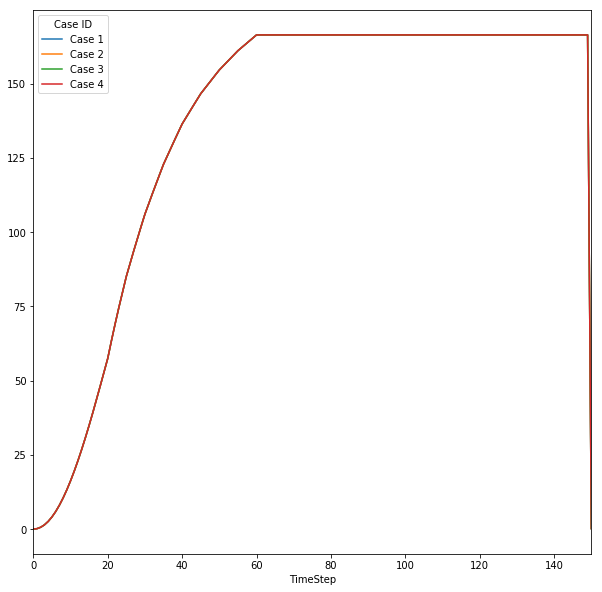

In [8]:
 #, 'Total Ecosystem', 'Dead Organic Matter']] \
bio_plot = pool_result[['TimeStep', 'Case ID', 'Total Biomass']] \
    .pivot(index='TimeStep', columns='Case ID', values='Total Biomass').plot(figsize=(10,10))

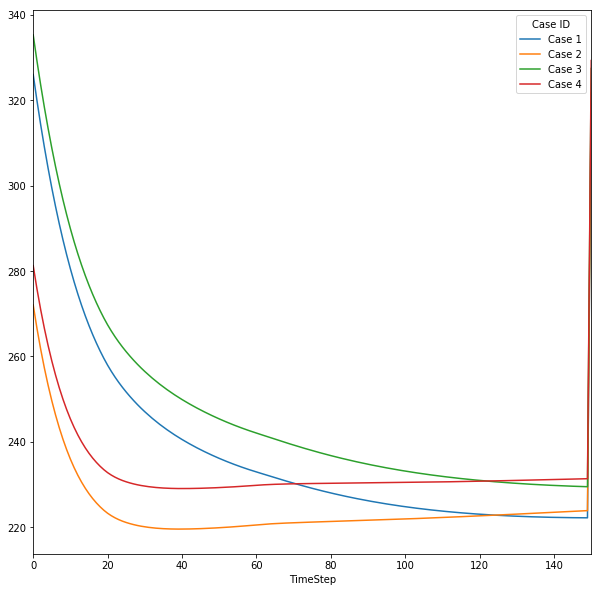

In [9]:
dom_plot = pool_result[['TimeStep', 'Case ID', 'Dead Organic Matter']] \
    .pivot(index='TimeStep', columns='Case ID', values='Dead Organic Matter').plot(figsize=(10,10))